In [521]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [522]:
cnxn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=DESKTOP-MOPULB3;"
            "Database=tables_fait_fraud1;"
            "Trusted_Connection=yes;")

cnxn = pyodbc.connect(cnxn_str)

In [523]:
cursor = cnxn.cursor()
fait_BM = pd.read_sql("SELECT * FROM [fait_BM_fraud]", cnxn)

In [524]:
data=fait_BM[fait_BM["Fraud"]==0]

In [525]:
data

,index,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,coefBonusMalus,...,energie,dateInsertion,codeCompagnie,codeAgence,typeIntermediaire,naturePolice,typePolice,Etat_Police,Fraud,num_accidents
0,0,6591,6599,6389,5219,1,V,2018-07-31 00:00:00,1,70,...,ESSENCE,2017-10-05,13.0,208,3.0,R,I,V,0,0.0
1,1,6592,6600,6390,5220,1,V,2017-09-23 00:00:00,1,70,...,ESSENCE,2017-10-05,13.0,227,3.0,R,I,V,0,0.0
2,2,6593,6601,6391,5221,1,V,2017-09-27 00:00:00,1,70,...,ESSENCE,2017-10-05,13.0,227,3.0,R,I,V,0,0.0
3,3,6594,6602,6392,5222,1,V,2017-03-15 00:00:00,1,70,...,ESSENCE,2017-10-05,13.0,208,3.0,R,I,V,0,0.0
5,5,6596,6604,6394,5224,5,V,2017-11-22 00:00:00,1,80,...,GASOIL,2017-12-28,13.0,208,3.0,R,I,R,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307354,1239058,1436463,1428409,1094921,1068073,6,V,2016-02-13 00:00:00,1,80,...,GASOIL,2017-10-05,6.0,000066,1.0,R,I,S,0,0.0
1307356,1239060,1382705,1377735,1071765,1053754,1,V,2016-08-12 00:00:00,1,70,...,GASOIL,2017-10-05,12.0,01Z,2.0,R,I,V,0,0.0
1307357,1239061,1436464,1428410,1094922,1068073,1,V,2018-03-08 00:00:00,3,90,...,ESSENCE,2017-10-05,6.0,000066,1.0,R,I,V,0,0.0
1307359,1239063,1382706,1377736,492136,467217,5,V,2018-01-24 00:00:00,3,100,...,GASOIL,2017-10-05,7.0,82,2.0,R,I,V,0,0.0


In [526]:
data.dtypes

index                    int64
CodeBonusMalus_id        int64
CodePolice_id            int64
CodeVehicule_id          int64
CodeAssure_id            int64
codeUsage                int64
ETAT_VEHICULE           object
DATE_AFFECTATION        object
classeBonusMalus         int64
coefBonusMalus           int64
codeMarque             float64
puissanceFiscal        float64
typeImmatriculation     object
energie                 object
dateInsertion           object
codeCompagnie          float64
codeAgence              object
typeIntermediaire      float64
naturePolice            object
typePolice              object
Etat_Police             object
Fraud                    int64
num_accidents          float64
dtype: object

In [527]:
for i in ("codeAgence","Fraud","energie","ETAT_VEHICULE","typeImmatriculation","naturePolice","Etat_Police","num_accidents"):
    print(i,"\n",data[i].value_counts())

codeAgence 
 101       15991
100       12986
103       12122
55         9324
911        7457
          ...  
000975        1
000235        1
51W           1
78A           1
13H           1
Name: codeAgence, Length: 1044, dtype: int64
Fraud 
 0    1082005
Name: Fraud, dtype: int64
energie 
 ESSENCE                582587
GASOIL                 493256
unkown                   3410
ESS-GAZ GPL              2742
ESS-GNC                     5
ESSENCE-ELECTRICITE         3
ELECTRICITE                 2
Name: energie, dtype: int64
ETAT_VEHICULE 
 V    1082005
Name: ETAT_VEHICULE, dtype: int64
typeImmatriculation 
 TU      1030539
RS        33653
TRAC      11225
REM        3380
ES         2542
CD          270
PAT         131
AA          114
MD          111
CMD          21
CC           13
MOTO          5
IT            1
Name: typeImmatriculation, dtype: int64
naturePolice 
 R    959146
T    122859
Name: naturePolice, dtype: int64
Etat_Police 
 V    894060
R    180671
S      7274
Name: Etat_Polic

In [528]:
pd.get_dummies(data, columns=["naturePolice"])

,index,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,coefBonusMalus,...,dateInsertion,codeCompagnie,codeAgence,typeIntermediaire,typePolice,Etat_Police,Fraud,num_accidents,naturePolice_R,naturePolice_T
0,0,6591,6599,6389,5219,1,V,2018-07-31 00:00:00,1,70,...,2017-10-05,13.0,208,3.0,I,V,0,0.0,1,0
1,1,6592,6600,6390,5220,1,V,2017-09-23 00:00:00,1,70,...,2017-10-05,13.0,227,3.0,I,V,0,0.0,1,0
2,2,6593,6601,6391,5221,1,V,2017-09-27 00:00:00,1,70,...,2017-10-05,13.0,227,3.0,I,V,0,0.0,1,0
3,3,6594,6602,6392,5222,1,V,2017-03-15 00:00:00,1,70,...,2017-10-05,13.0,208,3.0,I,V,0,0.0,1,0
5,5,6596,6604,6394,5224,5,V,2017-11-22 00:00:00,1,80,...,2017-12-28,13.0,208,3.0,I,R,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307354,1239058,1436463,1428409,1094921,1068073,6,V,2016-02-13 00:00:00,1,80,...,2017-10-05,6.0,000066,1.0,I,S,0,0.0,1,0
1307356,1239060,1382705,1377735,1071765,1053754,1,V,2016-08-12 00:00:00,1,70,...,2017-10-05,12.0,01Z,2.0,I,V,0,0.0,1,0
1307357,1239061,1436464,1428410,1094922,1068073,1,V,2018-03-08 00:00:00,3,90,...,2017-10-05,6.0,000066,1.0,I,V,0,0.0,1,0
1307359,1239063,1382706,1377736,492136,467217,5,V,2018-01-24 00:00:00,3,100,...,2017-10-05,7.0,82,2.0,I,V,0,0.0,1,0


In [529]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [530]:
data=MultiColumnLabelEncoder(columns = ['energie','ETAT_VEHICULE','typeImmatriculation','naturePolice'
                                  ,'typePolice','Etat_Police']).fit_transform(data)


In [531]:
data.dtypes

index                    int64
CodeBonusMalus_id        int64
CodePolice_id            int64
CodeVehicule_id          int64
CodeAssure_id            int64
codeUsage                int64
ETAT_VEHICULE            int32
DATE_AFFECTATION        object
classeBonusMalus         int64
coefBonusMalus           int64
codeMarque             float64
puissanceFiscal        float64
typeImmatriculation      int32
energie                  int32
dateInsertion           object
codeCompagnie          float64
codeAgence              object
typeIntermediaire      float64
naturePolice             int32
typePolice               int32
Etat_Police              int32
Fraud                    int64
num_accidents          float64
dtype: object

In [532]:
data = data.drop(['index',
                  'CodeBonusMalus_id','CodePolice_id','CodeVehicule_id',
     'codeUsage','ETAT_VEHICULE'], axis=1)

In [533]:
data.dtypes

CodeAssure_id            int64
DATE_AFFECTATION        object
classeBonusMalus         int64
coefBonusMalus           int64
codeMarque             float64
puissanceFiscal        float64
typeImmatriculation      int32
energie                  int32
dateInsertion           object
codeCompagnie          float64
codeAgence              object
typeIntermediaire      float64
naturePolice             int32
typePolice               int32
Etat_Police              int32
Fraud                    int64
num_accidents          float64
dtype: object

In [534]:
data = data.drop(['codeAgence','codeCompagnie'], axis=1)

In [535]:
data.dtypes

CodeAssure_id            int64
DATE_AFFECTATION        object
classeBonusMalus         int64
coefBonusMalus           int64
codeMarque             float64
puissanceFiscal        float64
typeImmatriculation      int32
energie                  int32
dateInsertion           object
typeIntermediaire      float64
naturePolice             int32
typePolice               int32
Etat_Police              int32
Fraud                    int64
num_accidents          float64
dtype: object

In [536]:
data['DATE_AFFECTATION'].value_counts()

2018-01-01    9871
2017-12-16    9332
2018-01-06    8158
2018-02-03    6780
2017-03-11    6769
              ... 
2019-02-02       1
2019-01-20       1
2019-01-28       1
2019-01-22       1
2018-11-20       1
Name: DATE_AFFECTATION, Length: 1306, dtype: int64

In [537]:
data['dateInsertion'].value_counts()

2017-10-05    996443
05/10/2017      6626
2018-01-03      2390
2017-12-18      1770
2017-12-15      1731
               ...  
03/04/2019         1
18/10/2018         1
03/01/2019         1
2017-11-25         1
31/07/2018         1
Name: dateInsertion, Length: 150, dtype: int64

In [538]:
data['DATE_AFFECTATION'] = pd.to_datetime(data['DATE_AFFECTATION'])

In [539]:
data.dtypes

CodeAssure_id                   int64
DATE_AFFECTATION       datetime64[ns]
classeBonusMalus                int64
coefBonusMalus                  int64
codeMarque                    float64
puissanceFiscal               float64
typeImmatriculation             int32
energie                         int32
dateInsertion                  object
typeIntermediaire             float64
naturePolice                    int32
typePolice                      int32
Etat_Police                     int32
Fraud                           int64
num_accidents                 float64
dtype: object

In [540]:
data['dateInsertion'] = pd.to_datetime(data['dateInsertion'])

In [541]:
data.dtypes

CodeAssure_id                   int64
DATE_AFFECTATION       datetime64[ns]
classeBonusMalus                int64
coefBonusMalus                  int64
codeMarque                    float64
puissanceFiscal               float64
typeImmatriculation             int32
energie                         int32
dateInsertion          datetime64[ns]
typeIntermediaire             float64
naturePolice                    int32
typePolice                      int32
Etat_Police                     int32
Fraud                           int64
num_accidents                 float64
dtype: object

In [542]:
data.shape

(1082005, 15)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

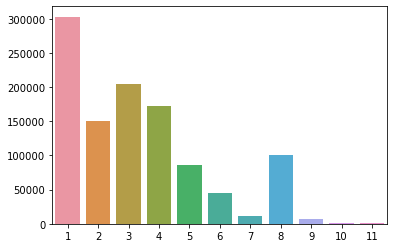

In [543]:
y = data["classeBonusMalus"].value_counts()
sns.barplot(y.index, y.values)

In [544]:
data["num_accidents"].value_counts()

0.0     932971
1.0     118743
2.0      23092
3.0       4988
4.0       1087
5.0        488
7.0        262
6.0        212
9.0         63
8.0         50
12.0        22
11.0        12
10.0        11
13.0         4
Name: num_accidents, dtype: int64

In [545]:
data.shape

(1082005, 15)

In [546]:
#nombre daccident est 0 et le BM index est superieure a 8
query = "SELECT CodeAssure_id,num_accidents,classeBonusMalus FROM fait_BM_fraud  where classeBonusMalus=1 and num_accidents>0"
results = cursor.execute(query).fetchall()
#sql to dataframe
dataframe = pd.read_sql(query, con = cnxn)

In [547]:
dataframe

,CodeAssure_id,num_accidents,classeBonusMalus
0,5223,4.0,1
1,5226,1.0,1
2,5223,4.0,1
3,5236,1.0,1
4,5223,4.0,1
...,...,...,...
43273,466404,1.0,1
43274,1041317,1.0,1
43275,1041356,1.0,1
43276,1041317,1.0,1


In [548]:
condition=(fait_BM["CodeAssure_id"].isin(dataframe["CodeAssure_id"]))
condition.value_counts()

False    1244532
True       62829
Name: CodeAssure_id, dtype: int64

In [549]:
data.loc[condition,'Fraud']=1

In [550]:
data['Fraud'].value_counts()

0    1043971
1      38034
Name: Fraud, dtype: int64

In [551]:
data=data[data["Fraud"]==0]

In [552]:
data.shape

(1043971, 15)

In [553]:
#nombre daccident est 0,1 et le BM index est egale a 11 
query = "SELECT CodeAssure_id,num_accidents,classeBonusMalus FROM fait_BM_fraud where classeBonusMalus =11 and num_accidents<2 "
results = cursor.execute(query).fetchall()


In [554]:
#sql to dataframe
dataframe = pd.read_sql(query, con = cnxn)


In [555]:
dataframe

,CodeAssure_id,num_accidents,classeBonusMalus
0,26514,0.0,11
1,26518,0.0,11
2,26535,1.0,11
3,66822,1.0,11
4,67373,0.0,11
...,...,...,...
461,807820,0.0,11
462,1018448,0.0,11
463,472868,0.0,11
464,951836,0.0,11


In [556]:
condition=(fait_BM["CodeAssure_id"].isin(dataframe["CodeAssure_id"]))
condition.shape

(1307361,)

In [557]:
data.loc[condition,'Fraud']=1


In [558]:
data['Fraud'].value_counts()


0    1042788
1       1183
Name: Fraud, dtype: int64

In [559]:
data=data[data["Fraud"]==0]


In [560]:
data.shape

(1042788, 15)

In [561]:
#nombre daccident est 0,1,2 et le BM index est egale a 11 
query = "SELECT CodeAssure_id,num_accidents,classeBonusMalus FROM fait_BM_fraud where classeBonusMalus in (9,10) and num_accidents<1 "
results = cursor.execute(query).fetchall()
#sql to dataframe
dataframe = pd.read_sql(query, con = cnxn)
dataframe

,CodeAssure_id,num_accidents,classeBonusMalus
0,129089,0.0,10
1,110235,0.0,9
2,129243,0.0,10
3,129269,0.0,9
4,110301,0.0,9
...,...,...,...
7170,1049094,0.0,10
7171,1049231,0.0,9
7172,748972,0.0,9
7173,1049363,0.0,9


In [562]:
condition=(fait_BM["CodeAssure_id"].isin(dataframe["CodeAssure_id"]))
data.loc[condition,'Fraud']=1
data['Fraud'].value_counts()
data=data[data["Fraud"]==0]
data.shape

(1034796, 15)

In [563]:
#nombre daccident est 0,1,2 et le BM index est egale a 11 
query = "SELECT CodeAssure_id,num_accidents,classeBonusMalus FROM fait_BM_fraud where classeBonusMalus>1 and classeBonusMalus<8 and num_accidents>2 "
results = cursor.execute(query).fetchall()
#sql to dataframe
dataframe = pd.read_sql(query, con = cnxn)
dataframe

,CodeAssure_id,num_accidents,classeBonusMalus
0,5301,3.0,3
1,5385,3.0,2
2,5421,4.0,3
3,5472,5.0,4
4,5499,8.0,5
...,...,...,...
13908,196476,3.0,3
13909,297258,4.0,2
13910,144027,3.0,2
13911,475936,3.0,5


In [564]:
condition=(fait_BM["CodeAssure_id"].isin(dataframe["CodeAssure_id"]))
data.loc[condition,'Fraud']=1
data['Fraud'].value_counts()
data=data[data["Fraud"]==0]
data.shape

(1029322, 15)

In [565]:
#nombre daccident est 0,1,2 et le BM index est egale a 11 
query = "SELECT CodeAssure_id,num_accidents,classeBonusMalus FROM fait_BM_fraud where classeBonusMalus=2 and num_accidents>1 "
results = cursor.execute(query).fetchall()
#sql to dataframe
dataframe = pd.read_sql(query, con = cnxn)
dataframe

,CodeAssure_id,num_accidents,classeBonusMalus
0,5385,3.0,2
1,5387,2.0,2
2,5428,2.0,2
3,5428,2.0,2
4,5436,2.0,2
...,...,...,...
8041,457442,2.0,2
8042,1041774,3.0,2
8043,1041181,2.0,2
8044,457356,4.0,2


In [566]:
condition=(fait_BM["CodeAssure_id"].isin(dataframe["CodeAssure_id"]))
data.loc[condition,'Fraud']=1

data=data[data["Fraud"]==0]
data.shape


(1025544, 15)

In [567]:
data = data.drop(['CodeAssure_id',
                 'Fraud'], axis=1)

In [569]:
data.corr()["classeBonusMalus"].sort_values(ascending=False)

classeBonusMalus       1.000000
coefBonusMalus         0.953611
num_accidents          0.155887
typePolice             0.014984
typeImmatriculation   -0.006698
codeMarque            -0.027847
puissanceFiscal       -0.039303
naturePolice          -0.055710
typeIntermediaire     -0.071822
Etat_Police           -0.109874
energie               -0.159059
Name: classeBonusMalus, dtype: float64

In [570]:
data.dtypes

DATE_AFFECTATION       datetime64[ns]
classeBonusMalus                int64
coefBonusMalus                  int64
codeMarque                    float64
puissanceFiscal               float64
typeImmatriculation             int32
energie                         int32
dateInsertion          datetime64[ns]
typeIntermediaire             float64
naturePolice                    int32
typePolice                      int32
Etat_Police                     int32
num_accidents                 float64
dtype: object

In [571]:
data = data.drop(['DATE_AFFECTATION',
                 'dateInsertion'], axis=1)

In [572]:
#La Normalisation(Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
# instanciation de l'objet
sc = MinMaxScaler()
#transformation – centrage-réduction
Z= sc.fit_transform(data)
print(Z)

[[0.         0.         0.08062744 ... 1.         1.         0.        ]
 [0.         0.         0.01059047 ... 1.         1.         0.        ]
 [0.         0.         0.00289739 ... 1.         1.         0.        ]
 ...
 [0.2        0.07142857 0.00109901 ... 1.         1.         0.        ]
 [0.2        0.10714286 0.00929164 ... 1.         1.         0.        ]
 [0.2        0.07142857 0.00949146 ... 1.         1.         0.        ]]


In [573]:
#séparer les entrées (caractéristiques) et la sortie (classe)
#Separer les variables explicatives de la variable cible
y= data['classeBonusMalus']
X= data.drop(['classeBonusMalus'], axis=1)


print (X.columns)
print (y)

Index(['coefBonusMalus', 'codeMarque', 'puissanceFiscal',
       'typeImmatriculation', 'energie', 'typeIntermediaire', 'naturePolice',
       'typePolice', 'Etat_Police', 'num_accidents'],
      dtype='object')
0          1
1          1
2          1
3          1
5          1
          ..
1307354    1
1307356    1
1307357    3
1307359    3
1307360    3
Name: classeBonusMalus, Length: 1025544, dtype: int64


In [574]:
#diviser les données en deux ensembles: entraînement et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [575]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.6439376672131247,
 'bernoulli': 0.29104316612528724,
 'multinomial': 0.17779348760108965}

In [592]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [593]:
y_pred = classifier.predict(X_test)

In [594]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78195  3025     0     0     0     0     0     0     0     0     0]
 [ 2093 38475  2374     0     0     0     0     0     0     0     0]
 [    4  2281 54814  3095     0     0     0     0     0     0     0]
 [    0     0  3076 46755   991     0     0     0     0     0     0]
 [    0     0     4   663 24481     2     0     0     0     0     0]
 [    0     0     0     0    15 13364     1     1     0     0     0]
 [    0     0     0     0     6     4  2891   287     0     0     0]
 [    0     0     0     0     2     0   111 29725     0     0     0]
 [    0     0     0     0     0     0     0     4   744     0     0]
 [    0     0     0     0     0     0     0     1     1   165     0]
 [    0     0     0     0     0     0     0     0     0     1    13]]
              precision    recall  f1-score   support

           1       0.97      0.96      0.97     81220
           2       0.88      0.90      0.89     42942
           3       0.91      0.91      0.91     60194
           4       0.93

In [595]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.941358104945655


In [581]:
from sklearn.neural_network import MLPClassifier

In [582]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train,y_train)
clf.score(X_test, y_test)

0.9265317465347693

In [584]:
ovr.score(X_test,y_test)

0.6136493279183264

In [585]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=3)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

In [586]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [588]:

print('Le test score est :', dt.score(X_test, y_test))

Le test score est : 0.9495293567008165


In [589]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
dlf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [591]:
 dlf.score(X_test, y_test)
    

0.6616341203390712

In [596]:
tlf=LogisticRegression(random_state=0)
ovr = OneVsRestClassifier(tlf)
# fit model
ovr.fit(X_train, y_train)
# make predictions
yhat = ovr.predict(X)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [598]:
ovr.score(X_test,y_test)

0.613558947423163

In [599]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.Collecting catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=462ca6aeaba6457324566b76a2718d0c01690d781e94f9c018cc6e20a0f665e7
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [600]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()

In [602]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [603]:
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9492


In [604]:
model.fit(X_train,y_train)

Learning rate set to 0.110658
0:	learn: 1.6323823	total: 1.74s	remaining: 29m
1:	learn: 1.3607337	total: 3.18s	remaining: 26m 27s
2:	learn: 1.1824297	total: 4.54s	remaining: 25m 9s
3:	learn: 1.0306316	total: 5.85s	remaining: 24m 17s
4:	learn: 0.9118354	total: 7.14s	remaining: 23m 41s
5:	learn: 0.8244853	total: 8.41s	remaining: 23m 12s
6:	learn: 0.7477115	total: 9.75s	remaining: 23m 3s
7:	learn: 0.6841118	total: 11.3s	remaining: 23m 27s
8:	learn: 0.6313545	total: 13.5s	remaining: 24m 49s
9:	learn: 0.5844912	total: 15.4s	remaining: 25m 20s
10:	learn: 0.5460619	total: 17.6s	remaining: 26m 24s
11:	learn: 0.5122342	total: 20.9s	remaining: 28m 37s
12:	learn: 0.4785462	total: 22.7s	remaining: 28m 40s
13:	learn: 0.4525086	total: 24.4s	remaining: 28m 39s
14:	learn: 0.4297281	total: 25.8s	remaining: 28m 12s
15:	learn: 0.4064763	total: 27.2s	remaining: 27m 51s
16:	learn: 0.3868962	total: 28.5s	remaining: 27m 28s
17:	learn: 0.3713131	total: 29.8s	remaining: 27m 4s
18:	learn: 0.3580006	total: 31.1s

153:	learn: 0.1571896	total: 4m 17s	remaining: 23m 32s
154:	learn: 0.1570930	total: 4m 18s	remaining: 23m 28s
155:	learn: 0.1568912	total: 4m 19s	remaining: 23m 24s
156:	learn: 0.1567540	total: 4m 20s	remaining: 23m 21s
157:	learn: 0.1565027	total: 4m 22s	remaining: 23m 17s
158:	learn: 0.1562866	total: 4m 23s	remaining: 23m 14s
159:	learn: 0.1561820	total: 4m 25s	remaining: 23m 11s
160:	learn: 0.1558004	total: 4m 26s	remaining: 23m 9s
161:	learn: 0.1556676	total: 4m 28s	remaining: 23m 7s
162:	learn: 0.1555433	total: 4m 29s	remaining: 23m 4s
163:	learn: 0.1553949	total: 4m 31s	remaining: 23m 2s
164:	learn: 0.1551518	total: 4m 32s	remaining: 23m
165:	learn: 0.1550361	total: 4m 34s	remaining: 22m 58s
166:	learn: 0.1548911	total: 4m 35s	remaining: 22m 55s
167:	learn: 0.1547997	total: 4m 37s	remaining: 22m 52s
168:	learn: 0.1547446	total: 4m 38s	remaining: 22m 50s
169:	learn: 0.1543499	total: 4m 40s	remaining: 22m 48s
170:	learn: 0.1542417	total: 4m 41s	remaining: 22m 46s
171:	learn: 0.1541

304:	learn: 0.1404115	total: 8m 13s	remaining: 18m 45s
305:	learn: 0.1404037	total: 8m 15s	remaining: 18m 44s
306:	learn: 0.1403442	total: 8m 17s	remaining: 18m 43s
307:	learn: 0.1403029	total: 8m 19s	remaining: 18m 42s
308:	learn: 0.1402510	total: 8m 21s	remaining: 18m 41s
309:	learn: 0.1401540	total: 8m 23s	remaining: 18m 40s
310:	learn: 0.1401031	total: 8m 25s	remaining: 18m 39s
311:	learn: 0.1400603	total: 8m 26s	remaining: 18m 37s
312:	learn: 0.1400369	total: 8m 28s	remaining: 18m 36s
313:	learn: 0.1400229	total: 8m 30s	remaining: 18m 35s
314:	learn: 0.1399501	total: 8m 32s	remaining: 18m 33s
315:	learn: 0.1399256	total: 8m 33s	remaining: 18m 32s
316:	learn: 0.1399144	total: 8m 35s	remaining: 18m 30s
317:	learn: 0.1398929	total: 8m 37s	remaining: 18m 29s
318:	learn: 0.1397966	total: 8m 38s	remaining: 18m 27s
319:	learn: 0.1397714	total: 8m 40s	remaining: 18m 26s
320:	learn: 0.1397555	total: 8m 42s	remaining: 18m 25s
321:	learn: 0.1396944	total: 8m 44s	remaining: 18m 24s
322:	learn

453:	learn: 0.1349317	total: 12m 20s	remaining: 14m 50s
454:	learn: 0.1349143	total: 12m 22s	remaining: 14m 49s
455:	learn: 0.1348646	total: 12m 24s	remaining: 14m 48s
456:	learn: 0.1348227	total: 12m 25s	remaining: 14m 46s
457:	learn: 0.1348129	total: 12m 27s	remaining: 14m 44s
458:	learn: 0.1348038	total: 12m 29s	remaining: 14m 43s
459:	learn: 0.1347632	total: 12m 30s	remaining: 14m 41s
460:	learn: 0.1347568	total: 12m 32s	remaining: 14m 39s
461:	learn: 0.1347380	total: 12m 33s	remaining: 14m 37s
462:	learn: 0.1347032	total: 12m 35s	remaining: 14m 36s
463:	learn: 0.1346969	total: 12m 37s	remaining: 14m 35s
464:	learn: 0.1346840	total: 12m 39s	remaining: 14m 34s
465:	learn: 0.1346793	total: 12m 41s	remaining: 14m 33s
466:	learn: 0.1346656	total: 12m 44s	remaining: 14m 32s
467:	learn: 0.1346525	total: 12m 45s	remaining: 14m 30s
468:	learn: 0.1346437	total: 12m 48s	remaining: 14m 29s
469:	learn: 0.1346371	total: 12m 50s	remaining: 14m 28s
470:	learn: 0.1346334	total: 12m 52s	remaining: 

601:	learn: 0.1319151	total: 16m 10s	remaining: 10m 41s
602:	learn: 0.1318914	total: 16m 12s	remaining: 10m 40s
603:	learn: 0.1318801	total: 16m 13s	remaining: 10m 38s
604:	learn: 0.1318765	total: 16m 15s	remaining: 10m 36s
605:	learn: 0.1318707	total: 16m 16s	remaining: 10m 34s
606:	learn: 0.1318502	total: 16m 17s	remaining: 10m 33s
607:	learn: 0.1318184	total: 16m 19s	remaining: 10m 31s
608:	learn: 0.1318125	total: 16m 20s	remaining: 10m 29s
609:	learn: 0.1317506	total: 16m 22s	remaining: 10m 27s
610:	learn: 0.1317204	total: 16m 23s	remaining: 10m 25s
611:	learn: 0.1317089	total: 16m 24s	remaining: 10m 24s
612:	learn: 0.1317023	total: 16m 25s	remaining: 10m 22s
613:	learn: 0.1316954	total: 16m 27s	remaining: 10m 20s
614:	learn: 0.1316866	total: 16m 28s	remaining: 10m 18s
615:	learn: 0.1316713	total: 16m 29s	remaining: 10m 17s
616:	learn: 0.1316659	total: 16m 31s	remaining: 10m 15s
617:	learn: 0.1316586	total: 16m 32s	remaining: 10m 13s
618:	learn: 0.1316532	total: 16m 33s	remaining: 

751:	learn: 0.1302515	total: 19m 27s	remaining: 6m 24s
752:	learn: 0.1302226	total: 19m 28s	remaining: 6m 23s
753:	learn: 0.1301991	total: 19m 29s	remaining: 6m 21s
754:	learn: 0.1301979	total: 19m 31s	remaining: 6m 20s
755:	learn: 0.1301701	total: 19m 32s	remaining: 6m 18s
756:	learn: 0.1301655	total: 19m 33s	remaining: 6m 16s
757:	learn: 0.1301539	total: 19m 35s	remaining: 6m 15s
758:	learn: 0.1301485	total: 19m 36s	remaining: 6m 13s
759:	learn: 0.1301436	total: 19m 37s	remaining: 6m 11s
760:	learn: 0.1301307	total: 19m 38s	remaining: 6m 10s
761:	learn: 0.1301068	total: 19m 40s	remaining: 6m 8s
762:	learn: 0.1300918	total: 19m 41s	remaining: 6m 7s
763:	learn: 0.1300874	total: 19m 43s	remaining: 6m 5s
764:	learn: 0.1300800	total: 19m 44s	remaining: 6m 3s
765:	learn: 0.1300736	total: 19m 46s	remaining: 6m 2s
766:	learn: 0.1300693	total: 19m 47s	remaining: 6m
767:	learn: 0.1300602	total: 19m 49s	remaining: 5m 59s
768:	learn: 0.1300508	total: 19m 50s	remaining: 5m 57s
769:	learn: 0.13004

902:	learn: 0.1289010	total: 23m 8s	remaining: 2m 29s
903:	learn: 0.1288963	total: 23m 10s	remaining: 2m 27s
904:	learn: 0.1288719	total: 23m 12s	remaining: 2m 26s
905:	learn: 0.1288705	total: 23m 13s	remaining: 2m 24s
906:	learn: 0.1288668	total: 23m 15s	remaining: 2m 23s
907:	learn: 0.1288510	total: 23m 16s	remaining: 2m 21s
908:	learn: 0.1288489	total: 23m 18s	remaining: 2m 19s
909:	learn: 0.1288345	total: 23m 19s	remaining: 2m 18s
910:	learn: 0.1288322	total: 23m 20s	remaining: 2m 16s
911:	learn: 0.1288313	total: 23m 21s	remaining: 2m 15s
912:	learn: 0.1288296	total: 23m 23s	remaining: 2m 13s
913:	learn: 0.1288278	total: 23m 24s	remaining: 2m 12s
914:	learn: 0.1288237	total: 23m 25s	remaining: 2m 10s
915:	learn: 0.1288226	total: 23m 27s	remaining: 2m 9s
916:	learn: 0.1288164	total: 23m 28s	remaining: 2m 7s
917:	learn: 0.1288129	total: 23m 30s	remaining: 2m 5s
918:	learn: 0.1288041	total: 23m 31s	remaining: 2m 4s
919:	learn: 0.1288028	total: 23m 33s	remaining: 2m 2s
920:	learn: 0.12

In [605]:
print('Accuracy of CatBoostClassifier on training set: {:.4f}'.format(model.score(X_train, y_train)))
print('Accuracy of CatBoostClassifier on test set: {:.4f}'.format(model.score(X_test, y_test)))

Accuracy of CatBoostClassifier on training set: 0.9502
Accuracy of CatBoostClassifier on test set: 0.9496


In [606]:
y_pred_catb = model.predict(X_test)
print(classification_report(y_pred_catb, y_test))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97     80379
           2       0.91      0.90      0.90     43229
           3       0.92      0.92      0.92     60606
           4       0.93      0.93      0.93     50797
           5       0.97      0.97      0.97     25319
           6       1.00      1.00      1.00     13382
           7       0.91      0.98      0.95      2972
           8       1.00      0.99      0.99     30054
           9       1.00      1.00      1.00       747
          10       0.99      1.00      0.99       165
          11       1.00      1.00      1.00        14

    accuracy                           0.95    307664
   macro avg       0.96      0.97      0.97    307664
weighted avg       0.95      0.95      0.95    307664



In [607]:

from sklearn.svm import SVC

In [608]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [609]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           1       0.97      0.93      0.95     84913
           2       0.62      0.90      0.73     29503
           3       0.90      0.76      0.82     71583
           4       0.80      0.88      0.84     45802
           5       0.91      0.73      0.81     31298
           6       0.60      0.80      0.69      9956
           7       0.71      0.71      0.71      3187
           8       1.00      0.98      0.99     30498
           9       0.99      1.00      1.00       745
          10       0.99      0.99      0.99       167
          11       0.86      1.00      0.92        12

    accuracy                           0.86    307664
   macro avg       0.85      0.88      0.86    307664
weighted avg       0.88      0.86      0.86    307664

